<a href="https://colab.research.google.com/github/LuizCarls/ML_Modelo_Cance_de_Mama/blob/main/ML_Modelo_Cance_de_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autor - Luiz Carlos Sousa da Silva
#### Este projeto compara e avalia diferentes modelos de classificação para prever se uma amostra de células é maligna ou benigna com base em características específicas extraídas do conjunto de dados de câncer de mama. O objetivo é identificar o modelo mais eficiente e preciso para auxiliar na detecção de câncer, utilizando métodos de aprendizado de máquina.

## Configuração do ambiente

In [34]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Carga do Dataset

O dataset contém informações sobre vários pacientes, com cada registro representando uma pessoa. As variáveis incluem características médicas relacionadas a medidas de células tumorais e outras informações sobre a morfologia do tumor. A última coluna, target (ou Outcome), indica se o tumor é maligno (1) ou benigno (0).

Descrição de Cada Coluna
- Mean area: A média das áreas das células no tumor, calculada a partir das áreas individuais das células. Isso ajuda a identificar o tamanho geral das células no tumor.
- Mean perimeter: A média dos perímetros das células no tumor. O perímetro refere-se à medida ao redor da célula. Isso ajuda a descrever a forma e o tamanho das células.
- Mean texture: A média da variação nos valores de textura das células no tumor. A textura descreve a variação nas intensidades da superfície celular, dando uma noção de quão "irregular" a célula pode ser.
- Mean radius: A média dos raios das células no tumor. O raio é metade do diâmetro da célula, fornecendo uma ideia aproximada do tamanho das células.

O objetivo é prever se um paciente possui um tumor maligno ou benigno com base em suas características médicas relacionadas à morfologia celular e outras medidas do tumor.

In [57]:
# Carregando dataset de câncer de mama
data = load_breast_cancer()

# Criar um DataFrame com as características e o alvo
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

# Selecionar colunas específicas para o exemplo
selected_columns = ['mean area', 'mean perimeter', 'mean texture', 'mean radius', 'target']
df_selected = df[selected_columns]

# Renomear a coluna 'target' para 'Diagnostic'
df_selected.rename(columns={'target': 'Diagnostic'}, inplace=True)

# Salvando o dataset ajustado
df_selected.to_csv('./MachineLearning/data/test_dataset_cancers.csv', index=False)

# Carregando dataset de câncer de mama
dataset = pd.DataFrame(data=data.data, columns=data.feature_names)
X = dataset[['mean area', 'mean perimeter', 'mean texture', 'mean radius']]  # Selecionando apenas os 4 atributos
y = data.target

# Mostra as primeiras linhas do dataset
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Separação em conjunto de treino e conjunto de teste com holdout

In [37]:
# Definindo o tamanho do conjunto de teste e a semente aleatória
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                  shuffle=True, random_state=seed, stratify=y)

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed)

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

LR: 0.914106 (0.042707)
KNN: 0.892174 (0.043597)
CART: 0.874734 (0.040651)
NB: 0.881063 (0.053852)
SVM: 0.878937 (0.044788)
Bagging: 0.892174 (0.042848)
RF: 0.896570 (0.042330)
ET: 0.898792 (0.042251)
Ada: 0.890048 (0.054134)
GB: 0.901063 (0.037446)
Voting: 0.905314 (0.043226)


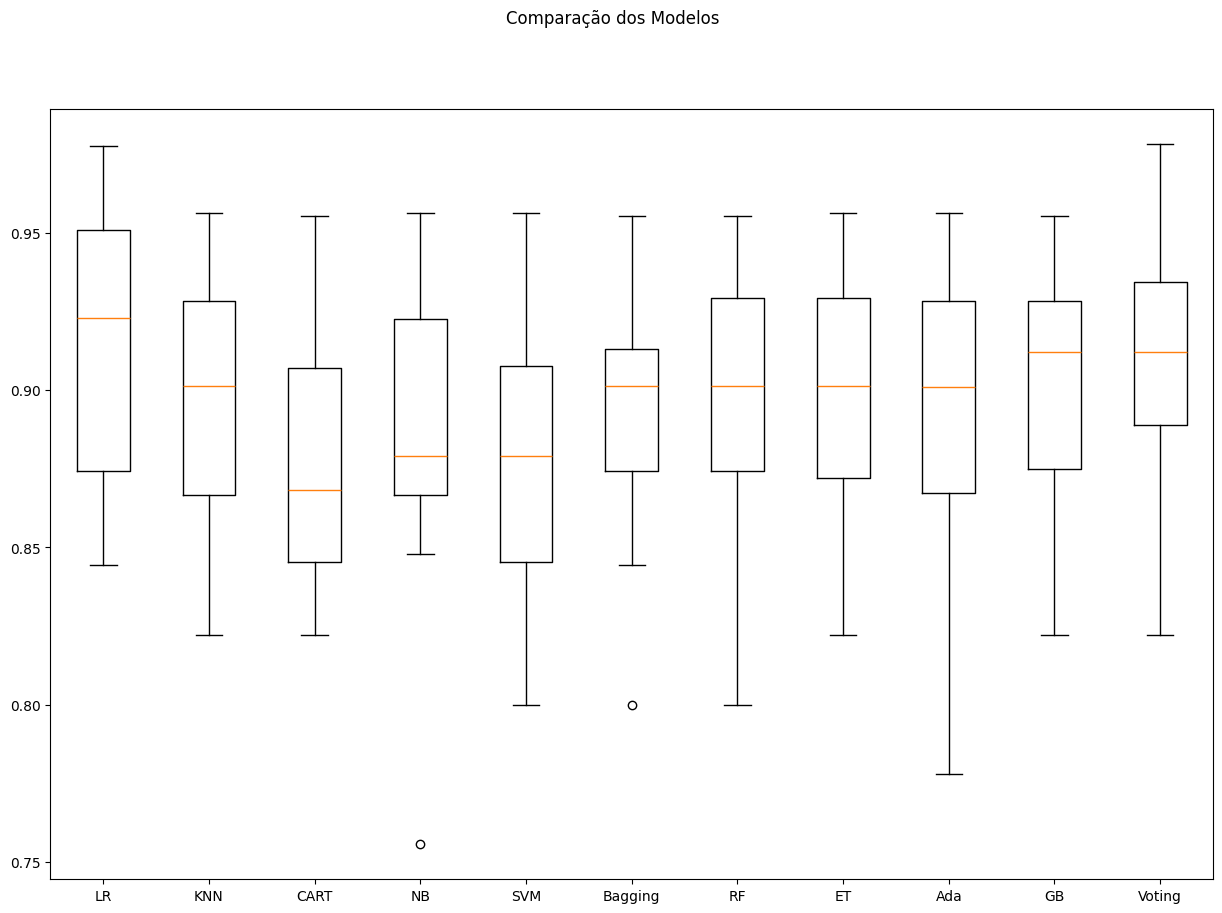

In [38]:
np.random.seed(7) # Definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

Trabalhando com dados pontencialmente desbalanceados ou sensíveis a escala

StandardScaler (padronização do conjunto de dados) e MinMaxScaler (normalização do conjunto de dados) são duas técnicas de normalização/escala usadas em machine learning para pré-processamento de dados e são úteis para preparar dados para algoritmos de aprendizado de máquina que são sensíveis à escala dos dados.

##### StandardScaler
StandardScaler padroniza os dados, ou seja, remove a média e escala os dados para que tenham uma variância unitária. Ele transforma os dados para que a média de cada feature seja 0 e a variância seja 1.

Fórmula: $z_i=\frac{x_i-\mu}{\sigma}$

 
onde:
- $x_i$ é o valor original do $i$-ésimo termo da feature.
- $\mu$ é a média dos valores da feature.
- $\sigma$ é o desvio padrão dos valores da feature.
𝑥
x é o valor original da feature.
𝜇
μ é a média dos valores da feature.
𝜎
σ é o desvio padrão dos valores da feature.


##### MinMaxScaler
MinMaxScaler escala e transforma os dados para um intervalo específico, geralmente entre 0 e 1. Ele transforma os dados para que o menor valor de uma feature seja 0 e o maior valor seja 1.

Fórmula: $z_i=\frac{x_i-min(x)}{max(x)-min(x)}$

onde:
- $x_i$ é o valor original do $i$-ésimo termo da feature.
- $min(x)$ é o menor valor da feature.
- $max(x)$ é o maior valor da feature.

Nós vamos aplicar essas técnicas para os dados do dataset de diabetes através da construção de pipelines. Pipelines são uma maneira de simplificar o processo de construção de modelos, permitindo que você execute várias etapas de pré-processamento e modelagem em sequência.

LR-orig: 0.914 (0.043)
KNN-orig: 0.892 (0.044)
CART-orig: 0.875 (0.041)
NB-orig: 0.881 (0.054)
SVM-orig: 0.879 (0.045)
Bag-orig: 0.892 (0.043)
RF-orig: 0.897 (0.042)
ET-orig: 0.899 (0.042)
Ada-orig: 0.890 (0.054)
GB-orig: 0.901 (0.037)
Vot-orig: 0.905 (0.043)
LR-padr: 0.899 (0.051)
KNN-padr: 0.894 (0.036)
CART-padr: 0.884 (0.040)
NB-padr: 0.881 (0.054)
SVM-padr: 0.905 (0.040)
Bag-padr: 0.899 (0.041)
RF-padr: 0.908 (0.043)
ET-padr: 0.899 (0.037)
Ada-padr: 0.888 (0.055)
GB-padr: 0.899 (0.040)
Vot-padr: 0.905 (0.036)
LR-norm: 0.886 (0.037)
KNN-norm: 0.901 (0.035)
CART-norm: 0.866 (0.051)
NB-norm: 0.881 (0.054)
SVM-norm: 0.905 (0.040)
Bag-norm: 0.894 (0.034)
RF-norm: 0.894 (0.046)
ET-norm: 0.901 (0.048)
Ada-norm: 0.888 (0.055)
GB-norm: 0.899 (0.040)
Vot-norm: 0.894 (0.037)


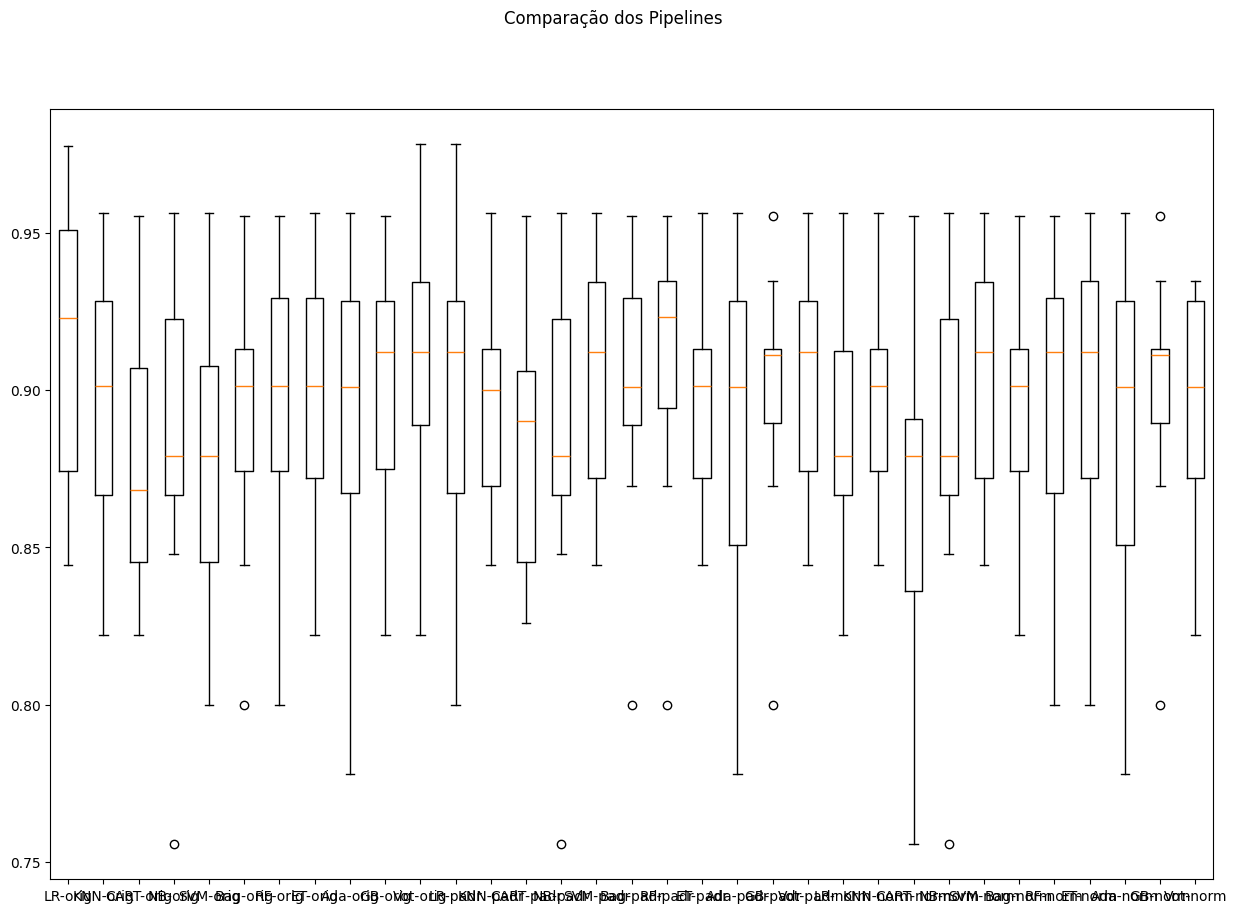

In [39]:
np.random.seed(7) # Definindo uma semente global para este bloco

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(estimators=bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos pipelines
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado') 
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

A otimização de hiperparâmetros é o processo de encontrar os valores ideais para os hiperparâmetros de um modelo de machine learning. O objetivo é encontrar a combinação de hiperparâmetros que resulta no melhor desempenho do modelo.


##### Grid Search (*força bruta*)

Como Funciona o Grid Search?
1. Definição do Espaço de Hiperparâmetros: Primeiro, define-se um conjunto de valores possíveis para cada hiperparâmetro.
2. Avaliação das Combinações: Em seguida, cada combinação possível desses valores é avaliada.
3. Seleção do Melhor Conjunto: A combinação de hiperparâmetros que produz o melhor desempenho é selecionada.

In [40]:
# Tuning do KNN
np.random.seed(7) # Definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [3, 5, 7, 9],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Executando o tuning
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.892174 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5}
Sem tratamento de missings: knn-padr - Melhor: 0.907633 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}
Sem tratamento de missings: knn-norm - Melhor: 0.907536 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}


In [41]:
# Modelo: LR-orig - Melhor: 0.766987 usando {'LR__C': 100, 'LR__solver': 'liblinear'}
# Modelo: LR-padr - Melhor: 0.770239 usando {'LR__C': 1, 'LR__solver': 'liblinear'}
# Modelo: LR-norm - Melhor: 0.768613 usando {'LR__C': 100, 'LR__solver': 'liblinear'}
# Modelo: KNN-orig - Melhor: 0.758843 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 13}
# Modelo: KNN-padr - Melhor: 0.752406 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 19}
# Modelo: KNN-norm - Melhor: 0.752406 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 19}
# Modelo: CART-orig - Melhor: 0.713275 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 5}
# Modelo: CART-padr - Melhor: 0.711649 usando {'CART__max_depth': 40, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 2}
# Modelo: CART-norm - Melhor: 0.711715 usando {'CART__max_depth': 40, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 2}
# Modelo: NB-orig - Melhor: 0.749114 usando {'NB__var_smoothing': 1e-08}
# Modelo: NB-padr - Melhor: 0.747488 usando {'NB__var_smoothing': 1e-09}
# Modelo: NB-norm - Melhor: 0.747488 usando {'NB__var_smoothing': 1e-09}
# Modelo: SVM-orig - Melhor: 0.768653 usando {'SVM__C': 100, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}
# Modelo: SVM-padr - Melhor: 0.770279 usando {'SVM__C': 10, 'SVM__gamma': 0.01, 'SVM__kernel': 'rbf'}
# Modelo: SVM-norm - Melhor: 0.775157 usando {'SVM__C': 100, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
# Modelo: Bagging-orig - Melhor: 0.757270 usando {}
# Modelo: Bagging-padr - Melhor: 0.760549 usando {}
# Modelo: Bagging-norm - Melhor: 0.755618 usando {}
# Modelo: RF-orig - Melhor: 0.776796 usando {'RF__max_depth': 30, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 5, 'RF__n_estimators': 200}
# Modelo: RF-padr - Melhor: 0.776823 usando {'RF__max_depth': None, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 4, 'RF__min_samples_split': 10, 'RF__n_estimators': 50}
# Modelo: RF-norm - Melhor: 0.783287 usando {'RF__max_depth': 10, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 50}
# Modelo: ET-orig - Melhor: 0.781714 usando {'ET__max_depth': 10, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 5, 'ET__n_estimators': 50}
# Modelo: ET-padr - Melhor: 0.776863 usando {'ET__max_depth': 10, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 2, 'ET__min_samples_split': 5, 'ET__n_estimators': 100}
# Modelo: ET-norm - Melhor: 0.776836 usando {'ET__max_depth': 30, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 4, 'ET__min_samples_split': 10, 'ET__n_estimators': 100}
# Modelo: Ada-orig - Melhor: 0.765414 usando {'Ada__learning_rate': 0.1, 'Ada__n_estimators': 100}
# Modelo: Ada-padr - Melhor: 0.765414 usando {'Ada__learning_rate': 0.1, 'Ada__n_estimators': 100}
# Modelo: Ada-norm - Melhor: 0.765414 usando {'Ada__learning_rate': 0.1, 'Ada__n_estimators': 100}
# Modelo: GB-orig - Melhor: 0.762188 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 7, 'GB__n_estimators': 100}
# Modelo: GB-padr - Melhor: 0.763774 usando {'GB__learning_rate': 0.1, 'GB__max_depth': 5, 'GB__n_estimators': 200}
# Modelo: GB-norm - Melhor: 0.767067 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 9, 'GB__n_estimators': 100}
# Modelo: Voting-orig - Melhor: 0.758896 usando {}
# Modelo: Voting-padr - Melhor: 0.757217 usando {}
# Modelo: Voting-norm - Melhor: 0.755631 usando {}

In [42]:
np.random.seed(7) # Definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [3, 5, 7, 9],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Executando o tuning
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.892174 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5}
Sem tratamento de missings: knn-padr - Melhor: 0.907633 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}
Sem tratamento de missings: knn-norm - Melhor: 0.907536 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}


## Finalização do Modelo

In [43]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train)  # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train)  # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test)  # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print("Acurácia no conjunto de teste:", accuracy_score(y_test, predictions))

Acurácia no conjunto de teste: 0.8859649122807017


Rodando o modelo a partir de um pipeline com os hiperparâmetros otimizados.

In [44]:
np.random.seed(7)

model = RandomForestClassifier(n_estimators=50, 
                               max_features='sqrt',
                               min_samples_split=2,
                               max_depth=10,
                               min_samples_leaf=1)

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('RF', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9298245614035088


## Salvando os arquivos

In [55]:
# Definindo nomes de arquivos
model_filename = 'rf_cancer_mama_classifier.pkl'
scaler_filename = 'minmax_scaler_cancers.pkl'
pipeline_filename = 'rf_cancers_pipeline.pkl'
X_test_filename = 'x_test_dataset_cancers.csv'
y_test_filename = 'y_test_dataset_cancers.csv'

# Salvando o modelo
with open("../models/" + model_filename, 'wb') as file:
    pickle.dump(model, file)

# Salvando o scaler
with open("../scalers/" + scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Salvando o pipeline
with open("../pipelines/" + pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

# Salvando X_test e y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=[dataset.columns[-1]])
X_test_df.to_csv("../data/" + X_test_filename, index=False)
y_test_df.to_csv("../data/" + y_test_filename, index=False)


## Simulando a aplicação do modelo em dados não vistos

In [46]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X)  # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X)  # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [47]:
# Ajustando os novos dados para ter os mesmos nomes de colunas que no treinamento
data = {
    'mean area': [500.0, 550.0, 480.0],
    'mean perimeter': [90.0, 100.0, 85.5],
    'mean texture': [20.5, 22.0, 21.3],
    'mean radius': [14.0, 15.5, 13.7],
}

# Verificar as colunas utilizadas no treinamento
atributos = ['mean area', 'mean perimeter', 'mean texture', 'mean radius']
entrada = pd.DataFrame(data, columns=atributos)

# Convertendo para DataFrame e garantindo a ordem correta das colunas
df_novos_dados = pd.DataFrame(data)
df_novos_dados = df_novos_dados[atributos]  # Reordenar as colunas para corresponder à ordem de treinamento

array_entrada = entrada.values
X_entrada = array_entrada[:,0:8].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)


[[-0.4405205  -0.08110488  0.28165692 -0.03615266]
 [-0.29831537  0.33079712  0.63071699  0.38986863]
 [-0.49740256 -0.26646078  0.46782229 -0.12135692]]


In [48]:
# Fazendo a predição com o melhor modelo
saidas = model.predict(rescaledEntradaX)

# Imprimindo resultados
print("Predições para os novos dados: ", saidas)

Predições para os novos dados:  [1 0 1]
